## Graficamos la diferencia de residuos pre y post merger vs masa de la gal pre merger

In [2]:
import numpy as np
import pandas as pd
import Curves2D
import matplotlib.pyplot as plt
from scipy import interpolate
from matplotlib import colors
import matplotlib.ticker as ticker

In [3]:
# Tamaño de visualización de los DataFrame

pd.options.display.max_rows = 100
pd.options.display.max_columns = 50

# Escribimos en latex

plt.rcParams['text.usetex'] = False

In [4]:
MEDIANS = pd.DataFrame(columns=['SnapNum','Log(Stars_Mass)','Log(SF_Mass+Stars_Mass)',
                                'Log(Stars_Metallicity/Z_sun)','12+Log(O/H)','SF_Mass/(SF_Mass+Stars_Mass)',
                                'Log(StarFormationRate)','Log(StarFormationRate/Stars_Mass)','R_halfmass30',
                                'KappaCoRot','Log(BlackHoleMass)'])

ERROR_MEDIANS = pd.DataFrame(columns=['SnapNum','Log(Stars_Mass)','Log(SF_Mass+Stars_Mass)',
                                'Log(Stars_Metallicity/Z_sun)','12+Log(O/H)','SF_Mass/(SF_Mass+Stars_Mass)',
                                'Log(StarFormationRate)','Log(StarFormationRate/Stars_Mass)','R_halfmass30',
                                'KappaCoRot','Log(BlackHoleMass)'])

In [5]:
# Escribimos en latex

plt.rcParams['text.usetex'] = False

## Calculamos las medianas para todas las magnitudes desde el snap 4 en adelante

In [6]:
for snap in np.arange(4,29):

    path ='/home/ramiro/Facultad/Tesis/Datos/Actividad 10/Tabla_para_medianas_RefL0100N1504_snap_'+str(snap)+'.dat'

    DF = pd.read_csv(path)

    VAR = pd.DataFrame(columns=['GalaxyID','SnapNum','Redshift','Log(Stars_Mass)','Log(SF_Mass+Stars_Mass)','Log(Stars_Metallicity/Z_sun)',
                                '12+Log(O/H)','SF_Mass/(SF_Mass+Stars_Mass)','Log(StarFormationRate)',
                                'Log(StarFormationRate/Stars_Mass)','R_halfmass30','Log(BlackHoleMass)'])

    VAR['GalaxyID'] = DF['GalaxyID']

    VAR['SnapNum']=DF['SnapNum']
    
    VAR['Redshift']=DF['redshift']

    VAR['Log(Stars_Mass)'] = np.log10(DF['Stars_Mass'])

    VAR['Log(SF_Mass+Stars_Mass)'] = np.log10(DF['SF_Mass']+DF['Stars_Mass'])

    VAR['Log(Stars_Metallicity/Z_sun)'] = np.log10(DF['Stars_Metallicity'])-np.log10(0.02)

    VAR['12+Log(O/H)'] = 12+np.log10(DF['SF_Oxygen']/DF['SF_Hydrogen'])-np.log10(16)
 
    VAR['SF_Mass/(SF_Mass+Stars_Mass)'] = DF['SF_Mass']/(DF['SF_Mass']+DF['Stars_Mass'])

    VAR['Log(StarFormationRate)'] = np.log10(DF['StarFormationRate'])

    VAR['Log(StarFormationRate/Stars_Mass)'] = np.log10(DF['StarFormationRate'])-np.log10(DF['Stars_Mass'])

    VAR['R_halfmass30'] = DF['R_halfmass30']

    VAR['Log(BlackHoleMass)'] = np.log10(DF['BlackHoleMass'])

    VAR['KappaCoRot'] = DF['KappaCoRot']

    # Magnitudes a las cuales les vamos a calcular la mediana y lso percentiles
    xvar = [
            VAR['Log(Stars_Mass)'].values,
           ]

    yvar =  [
            VAR['Log(Stars_Mass)'].values,
            VAR['Log(SF_Mass+Stars_Mass)'].values,
            VAR['Log(Stars_Metallicity/Z_sun)'].values,
            VAR['12+Log(O/H)'].values,
            VAR['SF_Mass/(SF_Mass+Stars_Mass)'].values,
            VAR['Log(StarFormationRate)'].values, 
            VAR['Log(StarFormationRate/Stars_Mass)'].values,
            VAR['R_halfmass30'].values,
            VAR['KappaCoRot'].values,
            VAR['Log(BlackHoleMass)'].values
            ]

    nbins     = 15    # Numero de bins en variable x a usar para dividir la muestra
    perc_low  = 25.   # Percentil a usar como cota inferior de error
    perc_high = 75.   # Percentil a usar como cota superior de error
    min_count = 10    # Mínima cantidad de elementos para considerar en un bin

    yvar_medians=[]
    yvar_errors=[]

    # Los valores medios y sus percentiles
    for j in np.arange(len(yvar)):
        xmedian,ymedian,xerror,yerror,elements=Curves2D.median_curve(xvar[0],yvar[j],bins=nbins,min_count=min_count,
                                                                     perc_low=perc_low,perc_high=perc_high)
        yvar_medians.append(ymedian)
        yvar_errors.append(yerror)


    mag = pd.Series(yvar_medians)

    mag_errors = pd.Series(yvar_errors)

    lugar = snap
    limite = 0

    # Nos contruimos los dataframaes finales
    
    MEDIANS.loc[lugar-limite,'SnapNum'] = snap
    MEDIANS.at[lugar-limite,'Log(Stars_Mass)'] = mag.iloc[0]
    MEDIANS.at[lugar-limite,'Log(SF_Mass+Stars_Mass)'] = mag.iloc[1]
    MEDIANS.at[lugar-limite,'Log(Stars_Metallicity/Z_sun)'] = mag.iloc[2]
    MEDIANS.at[lugar-limite,'12+Log(O/H)'] = mag.iloc[3]
    MEDIANS.at[lugar-limite,'SF_Mass/(SF_Mass+Stars_Mass)'] = mag.iloc[4]
    MEDIANS.at[lugar-limite,'Log(StarFormationRate)'] = mag.iloc[5]
    MEDIANS.at[lugar-limite,'Log(StarFormationRate/Stars_Mass)'] = mag.iloc[6]
    MEDIANS.at[lugar-limite,'R_halfmass30'] = mag.iloc[7]
    MEDIANS.at[lugar-limite,'KappaCoRot'] = mag.iloc[8]
    MEDIANS.at[lugar-limite,'Log(BlackHoleMass)'] = mag.iloc[9]



    ERROR_MEDIANS.loc[lugar-limite,'SnapNum'] = snap
    ERROR_MEDIANS.at[lugar-limite,'Log(Stars_Mass)'] = mag_errors.iloc[0]
    ERROR_MEDIANS.at[lugar-limite,'Log(SF_Mass+Stars_Mass)'] = mag_errors.iloc[1]
    ERROR_MEDIANS.at[lugar-limite,'Log(Stars_Metallicity/Z_sun)'] = mag_errors.iloc[2]
    ERROR_MEDIANS.at[lugar-limite,'12+Log(O/H)'] = mag_errors.iloc[3]
    ERROR_MEDIANS.at[lugar-limite,'SF_Mass/(SF_Mass+Stars_Mass)'] = mag_errors.iloc[4]
    ERROR_MEDIANS.at[lugar-limite,'Log(StarFormationRate)'] = mag_errors.iloc[5]
    ERROR_MEDIANS.at[lugar-limite,'Log(StarFormationRate/Stars_Mass)'] = mag_errors.iloc[6]
    ERROR_MEDIANS.at[lugar-limite,'R_halfmass30'] = mag_errors.iloc[7]
    ERROR_MEDIANS.at[lugar-limite,'KappaCoRot'] = mag_errors.iloc[8]
    ERROR_MEDIANS.at[lugar-limite,'Log(BlackHoleMass)'] = mag_errors.iloc[9]

/home/ramiro/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [7]:
# MEDIANS

In [8]:
# ERROR_MEDIANS

## Descargamos los datos de las galxias post y pre mergers

In [9]:
path ='/home/ramiro/Facultad/Tesis/Datos/Actividad 10/'

In [10]:
SUB = pd.read_csv(path+'Subhalo_maxmergers(todo>0.01).dat')
SIZ = pd.read_csv(path+'Sizes_maxmergers(todo>0.01).dat')
MOR = pd.read_csv(path+'MorphoKinem_maxmergers(todo>0.01).dat')
FOF = pd.read_csv(path+'FOF_maxmergers(todo>0.01).dat')

In [11]:
# Tiramos filas duplicadas

SIZ = SIZ.drop_duplicates()
MOR = MOR.drop_duplicates()
FOF = FOF.drop_duplicates()

In [12]:
# Armo un dataframe con las variables que usamos para graficar las galaxias que sufrieron mergers
VAR_SUB = pd.DataFrame(columns=['GalaxyID','GroupID','DescendantID','Lm','SnapNum','Redshift','SubGroupNumber','Log(Stars_Mass)','Log(SF_Mass+Stars_Mass)','Log(Stars_Metallicity/Z_sun)',
                                '12+Log(O/H)','SF_Mass/(SF_Mass+Stars_Mass)','Log(StarFormationRate)',
                                'Log(StarFormationRate/Stars_Mass)','Log(BlackHoleMass)'])

VAR_SUB['GalaxyID'] = SUB['GalaxyID']
VAR_SUB['DescendantID'] = SUB['DescendantID']
VAR_SUB['GroupID'] = SUB['GroupID']
VAR_SUB['Lm'] = SUB['Lm_max']
VAR_SUB['SnapNum']=SUB['SnapNum']
VAR_SUB['Redshift']=SUB['Redshift']
VAR_SUB['SubGroupNumber'] = SUB['SubGroupNumber']
VAR_SUB['Log(Stars_Mass)'] = np.log10(SUB['Stars_Mass'])
VAR_SUB['Log(SF_Mass+Stars_Mass)'] = np.log10(SUB['SF_Mass']+SUB['Stars_Mass'])
VAR_SUB['Log(Stars_Metallicity/Z_sun)'] = np.log10(SUB['Stars_Metallicity'])-np.log10(0.02)
VAR_SUB['12+Log(O/H)'] = 12+np.log10(SUB['SF_Oxygen']/SUB['SF_Hydrogen'])-np.log10(16)
VAR_SUB['SF_Mass/(SF_Mass+Stars_Mass)'] = SUB['SF_Mass']/(SUB['SF_Mass']+SUB['Stars_Mass'])
VAR_SUB['Log(StarFormationRate)'] = np.log10(SUB['StarFormationRate'])
VAR_SUB['Log(StarFormationRate/Stars_Mass)'] = np.log10(SUB['StarFormationRate'])-np.log10(SUB['Stars_Mass'])
VAR_SUB['Log(BlackHoleMass)'] = np.log10(SUB['BlackHoleMass'])

In [13]:
VAR_MOR = pd.merge(VAR_SUB,MOR)
VAR_SIZ = pd.merge(VAR_SUB,SIZ)
VAR_FOF = pd.merge(VAR_SUB,FOF)

In [14]:
# Definimos la funcion de interpolacion pa el snap n de la variable y
def interpolacion(x_val,y_nom,snap):
    
    mask =(MEDIANS['SnapNum'] == snap)
    x = MEDIANS['Log(Stars_Mass)'][mask].values[0]
    y = MEDIANS[y_nom][mask].values[0]
    f = interpolate.interp1d(x, y)
    return float(f(x_val))

## Contruimos los residuos de las galaxias en el snap anterior al merger

In [15]:
# Listas para los residuos pre y post merger.(0 pre y 1 post)
Res_Mayor   = []
Masas_Mayor = []
Red_Mayor   = []

for selec in np.arange(0,2):

    # Tabla con nuestras variables para las galaxias que sufrieron mayor mergers(Lm>1.25)

    res_mayor_Log_SMs     = np.array([])
    res_mayor_Log_SF_SMs  = np.array([])
    res_mayor_Log_S_MetZ  = np.array([])
    res_mayor_Log_OH      = np.array([])
    res_mayor_SFfrac      = np.array([])
    res_mayor_Log_SFR     = np.array([])
    res_mayor_Log_sSFR    = np.array([])
    res_mayor_Log_BH      = np.array([])
    res_mayor_RHM30       = np.array([])
    res_mayor_KcRot       = np.array([])
    Log_Star_mass_pre_sub = np.array([])
    Red_merger_sub        = np.array([])
    Log_Star_mass_pre_siz = np.array([])
    Red_merger_siz        = np.array([])
    Log_Star_mass_pre_mor = np.array([])
    Red_merger_mor        = np.array([])

    for i in np.arange(0,int(len(VAR_SUB))-1):
        
        mask_ID = (VAR_SUB['Lm'] >=1.25)&(VAR_SUB['Lm'] == VAR_SUB['Lm'].iloc[i])&((VAR_SUB['DescendantID'] == VAR_SUB['GalaxyID'].iloc[i+1])|(VAR_SUB['GalaxyID'] == VAR_SUB['DescendantID'].iloc[i])) #Nos aseguramos que restemos progenitor con descendiente
    
        if len(VAR_SUB[mask_ID])==int(2):
          
            snap = int(VAR_SUB[mask_ID]['SnapNum'].values[selec])# El snap de la galaxia que estamos analizando
            x_val= float(VAR_SUB[mask_ID]['Log(Stars_Mass)'].values[selec]) # log de la masa de la galaxia
            #Condiciones para poder interpolar sin problemas
            snap_l1 = VAR_SUB[mask_ID]['SnapNum'].values[0]
            snap_l2 = VAR_SUB[mask_ID]['SnapNum'].values[1]
            x_val_l1= VAR_SUB[mask_ID]['Log(Stars_Mass)'].values[0]
            x_val_l2= VAR_SUB[mask_ID]['Log(Stars_Mass)'].values[1]
            
            mask_snap_l1 = (MEDIANS['SnapNum'] == snap_l1)
            mask_snap_l2 = (MEDIANS['SnapNum'] == snap_l2)
            
            x_med_min_l1 = min(MEDIANS['Log(Stars_Mass)'][mask_snap_l1].values[0])
            x_med_max_l1 = max(MEDIANS['Log(Stars_Mass)'][mask_snap_l1].values[0])
            x_med_min_l2 = min(MEDIANS['Log(Stars_Mass)'][mask_snap_l2].values[0])
            x_med_max_l2 = max(MEDIANS['Log(Stars_Mass)'][mask_snap_l2].values[0])
        
            if ((x_val_l1<x_med_max_l1)and(x_val_l1>x_med_min_l1)and(x_val_l2<x_med_max_l2)and(x_val_l2>x_med_min_l2)):                    
                    
                    res_mayor_Log_SMs   = np.append(res_mayor_Log_SMs, VAR_SUB[mask_ID]['Log(Stars_Mass)'].values[selec] - interpolacion(x_val=x_val,y_nom='Log(Stars_Mass)',snap=snap))
                    res_mayor_Log_SF_SMs= np.append(res_mayor_Log_SF_SMs, VAR_SUB[mask_ID]['Log(SF_Mass+Stars_Mass)'].values[selec] - interpolacion(x_val=x_val,y_nom='Log(SF_Mass+Stars_Mass)',snap=snap))
                    res_mayor_Log_S_MetZ= np.append(res_mayor_Log_S_MetZ, VAR_SUB[mask_ID]['Log(Stars_Metallicity/Z_sun)'].values[selec] - interpolacion(x_val=x_val,y_nom='Log(Stars_Metallicity/Z_sun)',snap=snap))
                    res_mayor_Log_OH    = np.append(res_mayor_Log_OH, VAR_SUB[mask_ID]['12+Log(O/H)'].values[selec] - interpolacion(x_val=x_val,y_nom='12+Log(O/H)',snap=snap))
                    res_mayor_SFfrac    = np.append(res_mayor_SFfrac, VAR_SUB[mask_ID]['SF_Mass/(SF_Mass+Stars_Mass)'].values[selec] - interpolacion(x_val=x_val,y_nom='SF_Mass/(SF_Mass+Stars_Mass)',snap=snap))
                    res_mayor_Log_SFR   = np.append(res_mayor_Log_SFR, VAR_SUB[mask_ID]['Log(StarFormationRate)'].values[selec] - interpolacion(x_val=x_val,y_nom='Log(StarFormationRate)',snap=snap))
                    res_mayor_Log_sSFR  = np.append(res_mayor_Log_sSFR, VAR_SUB[mask_ID]['Log(StarFormationRate/Stars_Mass)'].values[selec] - interpolacion(x_val=x_val,y_nom='Log(StarFormationRate/Stars_Mass)',snap=snap))
                    res_mayor_Log_BH    = np.append(res_mayor_Log_BH, VAR_SUB[mask_ID]['Log(BlackHoleMass)'].values[selec] - interpolacion(x_val=x_val,y_nom='Log(BlackHoleMass)',snap=snap))
                    #Agregamos info de las masa pre merger y el snap de merger
                    Log_Star_mass_pre_sub= np.append(Log_Star_mass_pre_sub,VAR_SUB[mask_ID]['Log(Stars_Mass)'].values[1])
                    Red_merger_sub       = np.append(Red_merger_sub,VAR_SUB[mask_ID]['Redshift'].values[1])
                    
    for i in np.arange(0,len(VAR_SIZ)-1):
    
        mask_ID = (VAR_SIZ['Lm'] >=1.25)&(VAR_SIZ['Lm'] == VAR_SIZ['Lm'].iloc[i+1])&((VAR_SIZ['DescendantID'] == VAR_SIZ['GalaxyID'].iloc[i+1])|(VAR_SIZ['GalaxyID'] == VAR_SIZ['DescendantID'].iloc[i])) #Nos aseguramos que restemos progenitor con descendiente
    
        if len(VAR_SIZ[mask_ID])==int(2):
        
            snap = int(VAR_SIZ[mask_ID]['SnapNum'].values[selec])# El snap de la galaxia que estamos analizando
            x_val= float(VAR_SIZ[mask_ID]['Log(Stars_Mass)'].values[selec]) # log de la masa de la galaxia
            #Condiciones para poder interpolar sin problemas
            snap_l1 = VAR_SIZ[mask_ID]['SnapNum'].values[0]
            snap_l2 = VAR_SIZ[mask_ID]['SnapNum'].values[1]
            x_val_l1= VAR_SIZ[mask_ID]['Log(Stars_Mass)'].values[0]
            x_val_l2= VAR_SIZ[mask_ID]['Log(Stars_Mass)'].values[1]
            
            mask_snap_l1 = (MEDIANS['SnapNum'] == snap_l1)
            mask_snap_l2 = (MEDIANS['SnapNum'] == snap_l2)
            
            x_med_min_l1 = min(MEDIANS['Log(Stars_Mass)'][mask_snap_l1].values[0])
            x_med_max_l1 = max(MEDIANS['Log(Stars_Mass)'][mask_snap_l1].values[0])
            x_med_min_l2 = min(MEDIANS['Log(Stars_Mass)'][mask_snap_l2].values[0])
            x_med_max_l2 = max(MEDIANS['Log(Stars_Mass)'][mask_snap_l2].values[0])
        
            if ((x_val_l1<x_med_max_l1)and(x_val_l1>x_med_min_l1)and(x_val_l2<x_med_max_l2)and(x_val_l2>x_med_min_l2)):     
                
                res_mayor_RHM30=np.append(res_mayor_RHM30,VAR_SIZ[mask_ID]['R_halfmass30'].values[selec] - interpolacion(x_val=x_val,y_nom='R_halfmass30',snap=snap))
                #Agregamos info de las masa pre merger y el snap de merger
                Log_Star_mass_pre_siz= np.append(Log_Star_mass_pre_siz,VAR_SIZ[mask_ID]['Log(Stars_Mass)'].values[1])
                Red_merger_siz       = np.append(Red_merger_siz,VAR_SIZ[mask_ID]['Redshift'].values[1])
    
    for i in np.arange(0,len(VAR_MOR)-1):
    
        mask_ID = (VAR_MOR['Lm'] >=1.25)&(VAR_MOR['Lm'] == VAR_MOR['Lm'].iloc[i+1])&((VAR_MOR['DescendantID'] == VAR_MOR['GalaxyID'].iloc[i+1])|(VAR_MOR['GalaxyID'] == VAR_MOR['DescendantID'].iloc[i])) #Nos aseguramos que restemos progenitor con descendiente
    
        if len(VAR_MOR[mask_ID])==int(2):
        
            snap = int(VAR_MOR[mask_ID]['SnapNum'].values[selec])# El snap de la galaxia que estamos analizando
            x_val= float(VAR_MOR[mask_ID]['Log(Stars_Mass)'].values[selec]) # log de la masa de la galaxia
            #Condiciones para poder interpolar sin problemas
            snap_l1 = VAR_MOR[mask_ID]['SnapNum'].values[0]
            snap_l2 = VAR_MOR[mask_ID]['SnapNum'].values[1]
            x_val_l1= VAR_MOR[mask_ID]['Log(Stars_Mass)'].values[0]
            x_val_l2= VAR_MOR[mask_ID]['Log(Stars_Mass)'].values[1]
            
            mask_snap_l1 = (MEDIANS['SnapNum'] == snap_l1)
            mask_snap_l2 = (MEDIANS['SnapNum'] == snap_l2)
            
            x_med_min_l1 = min(MEDIANS['Log(Stars_Mass)'][mask_snap_l1].values[0])
            x_med_max_l1 = max(MEDIANS['Log(Stars_Mass)'][mask_snap_l1].values[0])
            x_med_min_l2 = min(MEDIANS['Log(Stars_Mass)'][mask_snap_l2].values[0])
            x_med_max_l2 = max(MEDIANS['Log(Stars_Mass)'][mask_snap_l2].values[0])
        
            if ((x_val_l1<x_med_max_l1)and(x_val_l1>x_med_min_l1)and(x_val_l2<x_med_max_l2)and(x_val_l2>x_med_min_l2)):     
                    res_mayor_KcRot=np.append(res_mayor_KcRot,VAR_MOR[mask_ID]['KappaCoRot'].values[selec] - interpolacion(x_val=x_val,y_nom='KappaCoRot',snap=snap))
                    #Agregamos info de las masa pre merger y el snap de merger
                    Log_Star_mass_pre_mor= np.append(Log_Star_mass_pre_mor,VAR_MOR[mask_ID]['Log(Stars_Mass)'].values[1])
                    Red_merger_mor       = np.append(Red_merger_mor,VAR_MOR[mask_ID]['Redshift'].values[1])  
                    
    dif_mayor = [res_mayor_Log_SMs, res_mayor_Log_SF_SMs, res_mayor_Log_S_MetZ, res_mayor_Log_OH, res_mayor_SFfrac, 
                 res_mayor_Log_SFR, res_mayor_Log_sSFR, res_mayor_Log_BH, res_mayor_RHM30, res_mayor_KcRot]
    
    masa_mayor = [Log_Star_mass_pre_sub,Log_Star_mass_pre_siz,Log_Star_mass_pre_mor]
    
    red_mayor  = [Red_merger_sub,Red_merger_siz,Red_merger_mor]
                 
    Res_Mayor.append(dif_mayor)

In [16]:
xvar = [masa_mayor[0],masa_mayor[0],masa_mayor[0],masa_mayor[0],masa_mayor[0],masa_mayor[0],masa_mayor[0],masa_mayor[1],masa_mayor[1],masa_mayor[2]]

yvar = [Res_Mayor[1][0], Res_Mayor[1][1], Res_Mayor[1][2], Res_Mayor[1][3], Res_Mayor[1][4], Res_Mayor[1][5], Res_Mayor[1][6], Res_Mayor[1][7], Res_Mayor[1][8], Res_Mayor[1][9]]

# yvar = [Res_Mayor[0][0], Res_Mayor[0][1], Res_Mayor[0][2], Res_Mayor[0][3], Res_Mayor[0][4], Res_Mayor[0][5], Res_Mayor[0][6], Res_Mayor[0][7], Res_Mayor[0][8], Res_Mayor[0][9]]

zvar = [red_mayor[0],red_mayor[1],red_mayor[2]]

In [17]:
xlabels=[r'$Log(M_\bigstar)[\rm{M}_\odot]$']

ylabels=[
          r'${\Delta}Log(M_\bigstar)[\rm{M}_\odot]$',r'${\Delta}Log(SF+M_\bigstar)[\rm{M}_\odot]$',r'${\Delta}Log(Z_{Star}/Z_{Sun})$',
          r'${\Delta}(12+Log(O/H))$',r'${\Delta}(SF/(SF+M_\bigstar))[\rm{M}_\odot]$',r'${\Delta}Log(SFR)$',r'${\Delta}Log(sSFR)$',
          r'${\Delta}Log(BHM)[\rm{M}_\odot]$',r'${\Delta}RHM30$',r'${\Delta}KcRot$'
        ]

<ipython-input-18-48486042fb0a>:24: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet_r"))
  cmap.set_under('k')    # Color por debajo de mínimo
<ipython-input-18-48486042fb0a>:24: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet_r"))
  cmap.set_under('k')    # Color por debajo de mínimo
<ipython-input-18-48486042fb0a>:24: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make

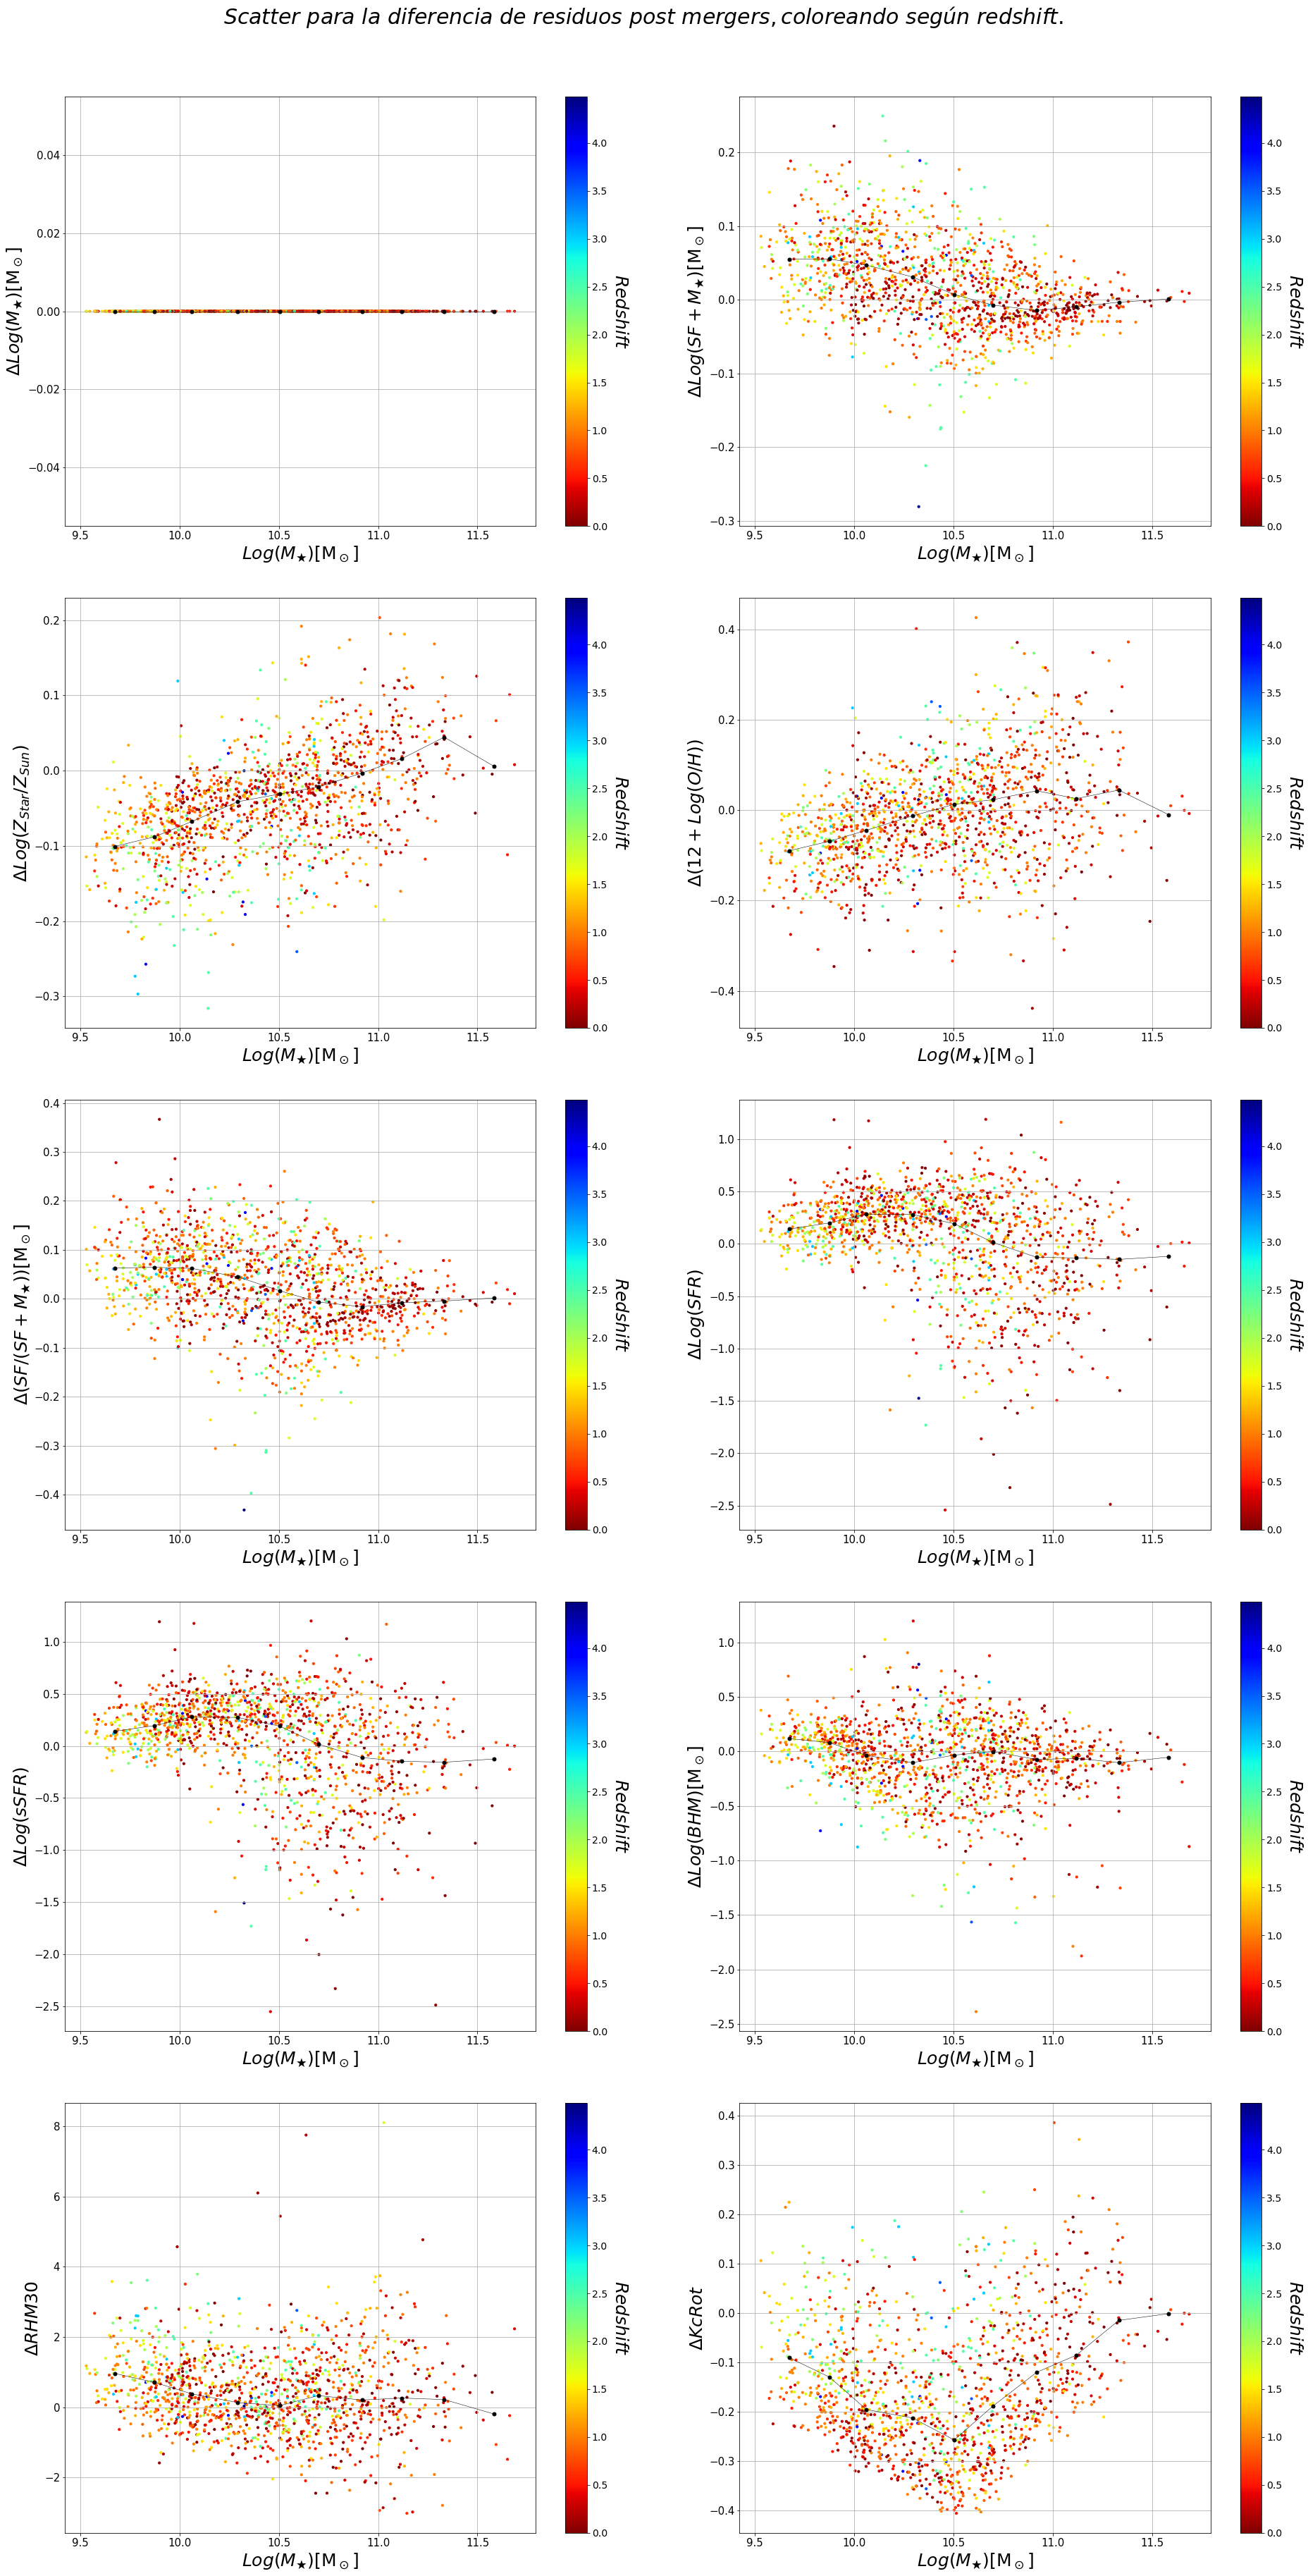

In [18]:
fig,ax = plt.subplots(5,2,figsize=(30,60))
ax = ax.flatten() # Convertimos a ax en una array plano para recorrerlo tranqui con un for 

fig.tight_layout(pad=10.0)

fontdict ={'fontsize': 30}

fig.suptitle(r'$Scatter\ para\ la\ diferencia\ de\ residuos\ post\ mergers, coloreando\ según\ redshift.$', fontsize=30)

# Para el calculo de las medianas

nbins=10        # Numero de bins en variable x a usar para dividir la muestra
perc_low=25.        # Percentil a usar como cota inferior de error
perc_high=75.       # Percentil a usar como cota superior de error
min_count=5         # Mínima cantidad de elementos para considerar en un bin

i=0
for varx,vary,labely in zip(xvar,yvar,ylabels):
   
        #PARTE DE DEFINICIONES PARA COLOREAR
        # Colors representing some property  
        # Define colormap to use
        cmap = plt.get_cmap('jet_r')    # Add _r to the name of colormap to invert it.    
        cmap.set_under('k')    # Color por debajo de mínimo

        # Propiedad a usar para colorear
        # Ojo!! Acá depende de la propiedad si tomar o no log10...
        # colors_var_key='Mass_Star'
        colors_var_label=r'$Redshift$'
        if i < 8: 
            colors_var = zvar[0]
        elif i == 8:
            colors_var = zvar[1]
        else: colors_var = zvar[2]
                                   
        #---------------------------------------------------------------
        # Esto es en caso de que se tome log y la variable para colorear sea cero
        # En estos casos, se asigna el color negro (con el 'set_under' del principio)
        mask_color=~(np.logical_or(np.isinf(colors_var),np.isnan(colors_var)))
        #---------------------------------------------------------------

        # Escaleo los colores "a mano". Es una escala lineal.
        vmin=min(colors_var[mask_color])
        vmax=max(colors_var[mask_color])
        a=1./float(vmax-vmin)
        b=-a*vmin
        colorss=(a*colors_var+b)   # Array de números que representan colores
        facecolor=cmap(colorss)    # Esto transforma "números" a 4-tuplas que representan colores
        
        
        # Scatter plot 'falso', para armar barra de referencia
        sc_bar=ax[i].scatter(varx,vary,c=colorss,vmin=vmin,vmax=vmax,cmap=cmap,s=0)
        # Agrego barra de referencia para colres
        cbar=fig.colorbar(mappable=sc_bar,ax=ax[i],orientation='vertical')
        cbar.set_label(colors_var_label,fontsize=25,rotation=270,labelpad=30)
        cbar.ax.tick_params(labelsize=14)
        
        #Medianas
        xmedian,ymedian,xerror,yerror,elements=Curves2D.median_curve(varx,vary,bins=nbins,min_count=min_count,perc_low=perc_low,perc_high=perc_high)
        ax[i].plot(xmedian,ymedian,c='k',marker='o',ms=5,linestyle='-',linewidth=0.5,label='Mediana')

        
        #PARTE DE SCATTER
                        
        xlim=(min(varx)-0.05*abs(min(varx)),max(varx)+0.05*abs(max(varx)))
        ylim=(min(vary)-0.05*abs(min(vary)),max(vary)+0.05*abs(max(vary)))

        ax[i].set_xlabel(str(xlabels[0]),fontsize=25)
        ax[i].set_ylabel(labely,fontsize=25)

        ax[i].tick_params(axis='both', which='major', labelsize=15)
        
        # Scatter coloreado y dimensionado
        ax[i].scatter(varx,vary,marker='o',c=facecolor,s=10)
   
        plt.subplots_adjust(left=0.12,right=0.95,bottom=0.15,top=0.95)

        ax[i].grid()
        i=i+1
# plt.savefig('/home/ramiro/Facultad/Tesis/Figuras/Actividad 10/dif_residuos_postmerger.png')
plt.show()

In [ ]:
# Fin